# Importing Importing Libraries

In [1]:
# Import necessary libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt
from scipy.stats import pearsonr
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

import warnings

# Ignore specific warnings
warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=FutureWarning)

# Initialize Plotly's notebook mode to work in Jupyter notebooks with interactive plots
py.init_notebook_mode(connected=True)

# Reading The Dataset

In [2]:
df = pd.read_csv('GlobalTemperatures.csv')

In [3]:
df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.tail()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063
3191,2015-12-01,5.518,0.100,10.725,0.154,0.287,0.099,14.774,0.062


# Finding The Shape

In [5]:
df.shape

(3192, 9)

# Understanding Data Types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


# Handling Missing Values

In [7]:
df.isnull().sum()

dt                                              0
LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

<Axes: >

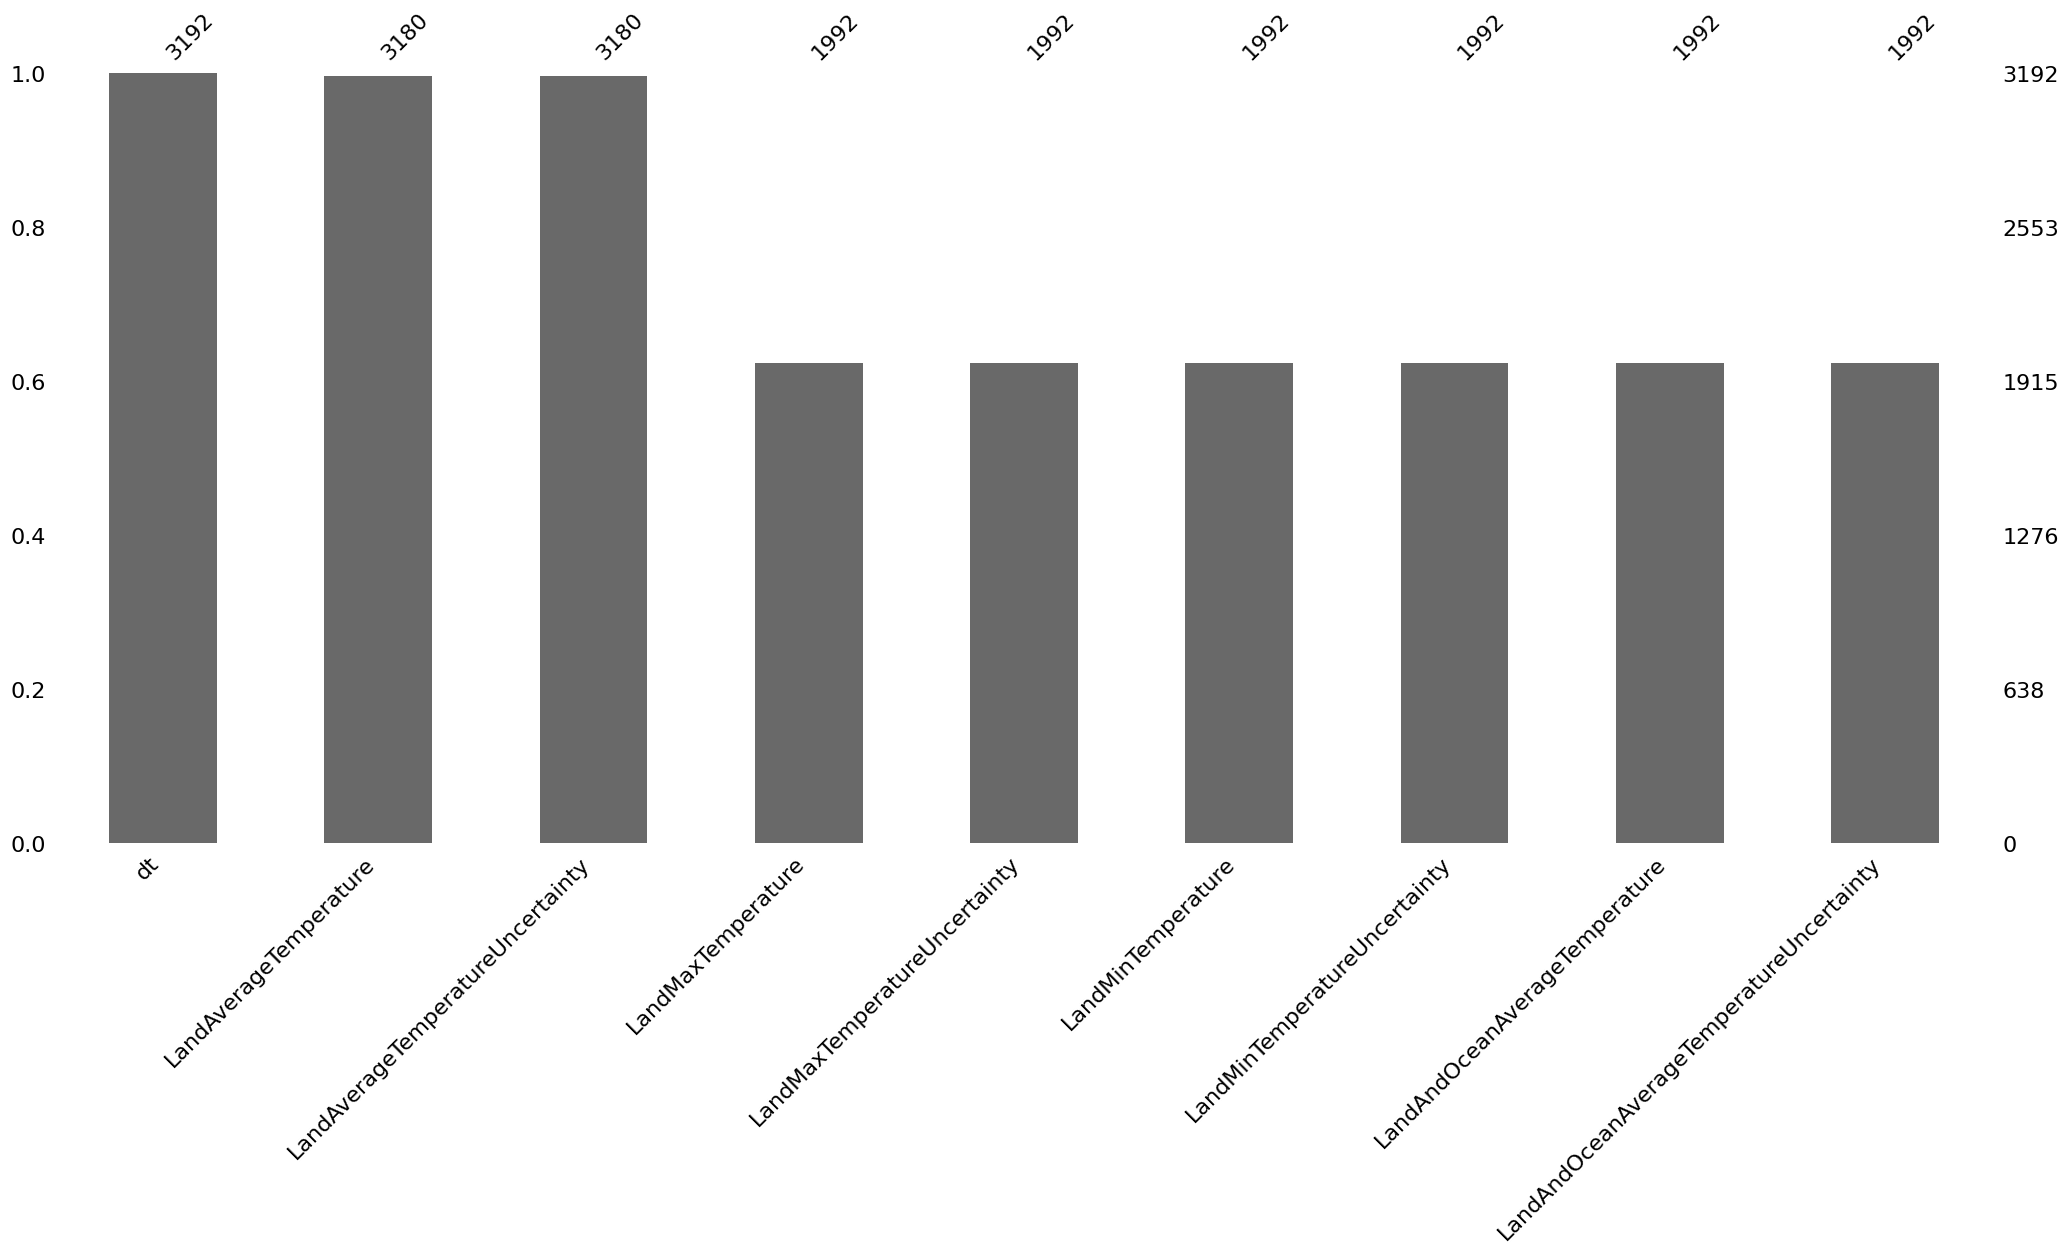

In [8]:
import missingno as msno
msno.bar(df)

In [9]:
# Impute LandAverageTemperature and LandAverageTemperatureUncertainty with mean

# Fill missing values in the 'LandAverageTemperature' column with the mean of that column
df['LandAverageTemperature'].fillna(df['LandAverageTemperature'].mean(), inplace=True)

# Fill missing values in the 'LandAverageTemperatureUncertainty' column with the mean of that column
df['LandAverageTemperatureUncertainty'].fillna(df['LandAverageTemperatureUncertainty'].mean(), inplace=True)

In [10]:
# For columns with 1200 missing values, drop those rows

# List of columns to check for missing values
cols_to_dropna = ['LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']

# Loop through each column in the list
for col in cols_to_dropna:
    # Drop rows where the specified column has missing values
    df.dropna(subset=[col], inplace=True)


In [11]:
# Verify if there are any remaining missing values
print(df.isnull().sum())

dt                                           0
LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64


In [12]:
df.shape

(1992, 9)

# Checking For Duplicates

In [13]:
df.duplicated().sum()

0

# Plotting

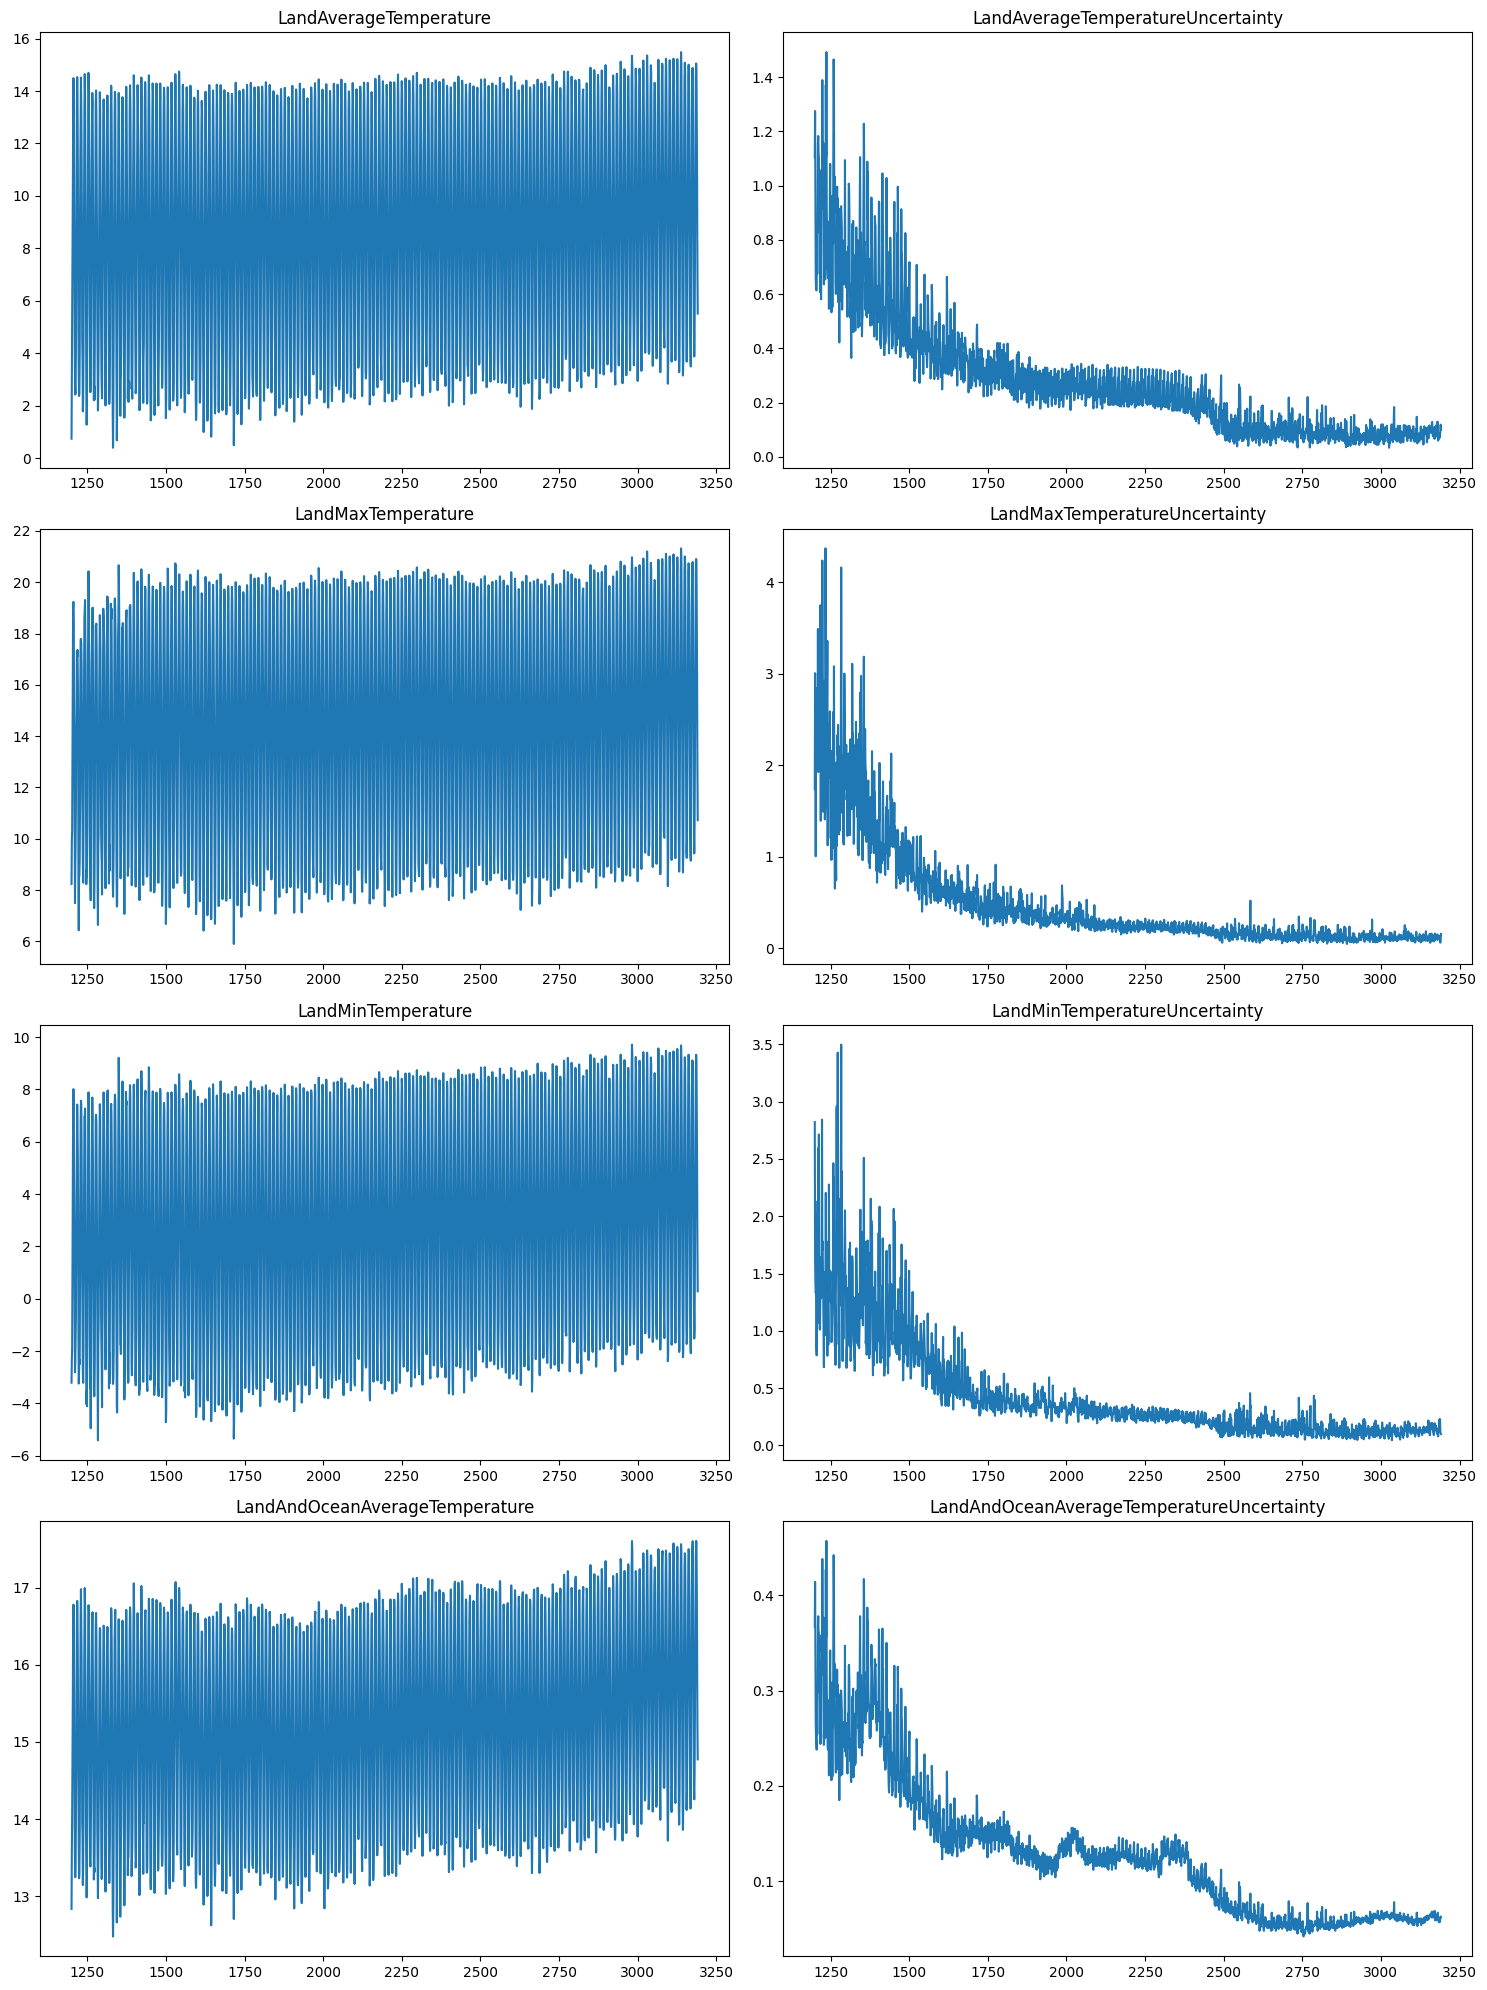

In [14]:
import matplotlib.pyplot as plt

# Create a 4x2 grid of subplots, with a figure size of 15x20 inches
fig, axs = plt.subplots(4, 2, figsize=(15, 20))

# List of columns to plot line plots for
columns = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty', 'LandMaxTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperature', 'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']

# Loop through each subplot and the corresponding column
for i, ax in enumerate(axs.flatten()):
    # Plot line plot for the i-th column, excluding missing values
    ax.plot(df[columns[i]].dropna())
    # Set the title of the subplot to the column name
    ax.set_title(columns[i])

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


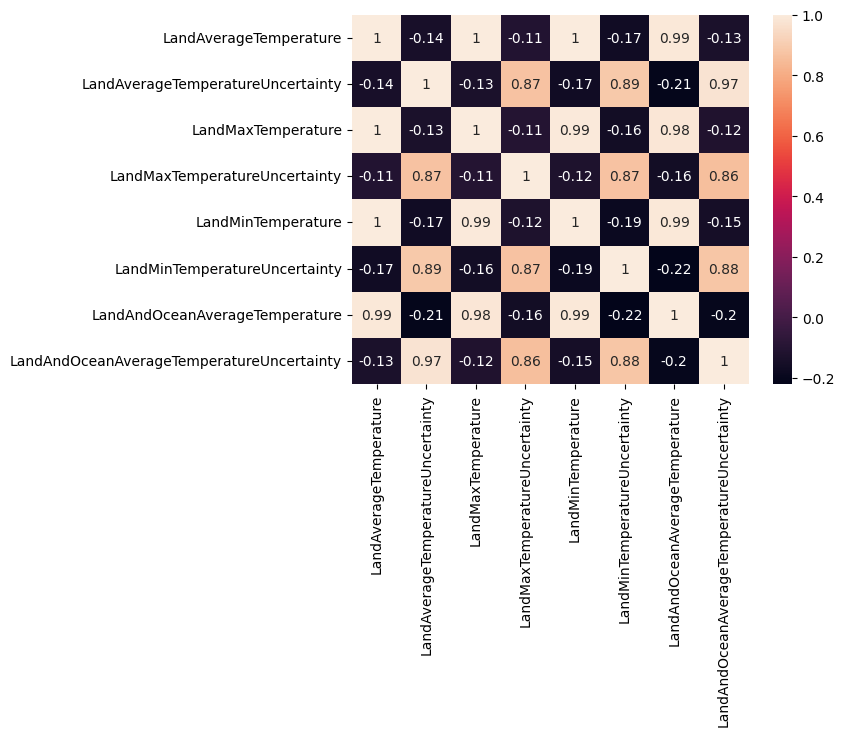

In [15]:
# Correlation Heatmap

# Calculate the correlation matrix of the DataFrame, considering only numeric columns
hm = df.corr(numeric_only=True)

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(hm, annot=True)

# Display the plot
plt.show()

# Importing The Libraries

In [16]:
# Select 'dt' and 'LandAverageTemperature' columns from the DataFrame
data = df[['dt', 'LandAverageTemperature']]

# Extract the year from the 'dt' column and create a new 'year' column
data['year'] = data['dt'].apply(lambda x: x[:4])

# Drop rows with any missing values
data.dropna(inplace=True)

# Convert 'dt' column to datetime format
data['dt'] = pd.to_datetime(data['dt'])

# Set the 'dt' column as the index of the DataFrame
data.set_index('dt', inplace=True)

# Univariate Analysis

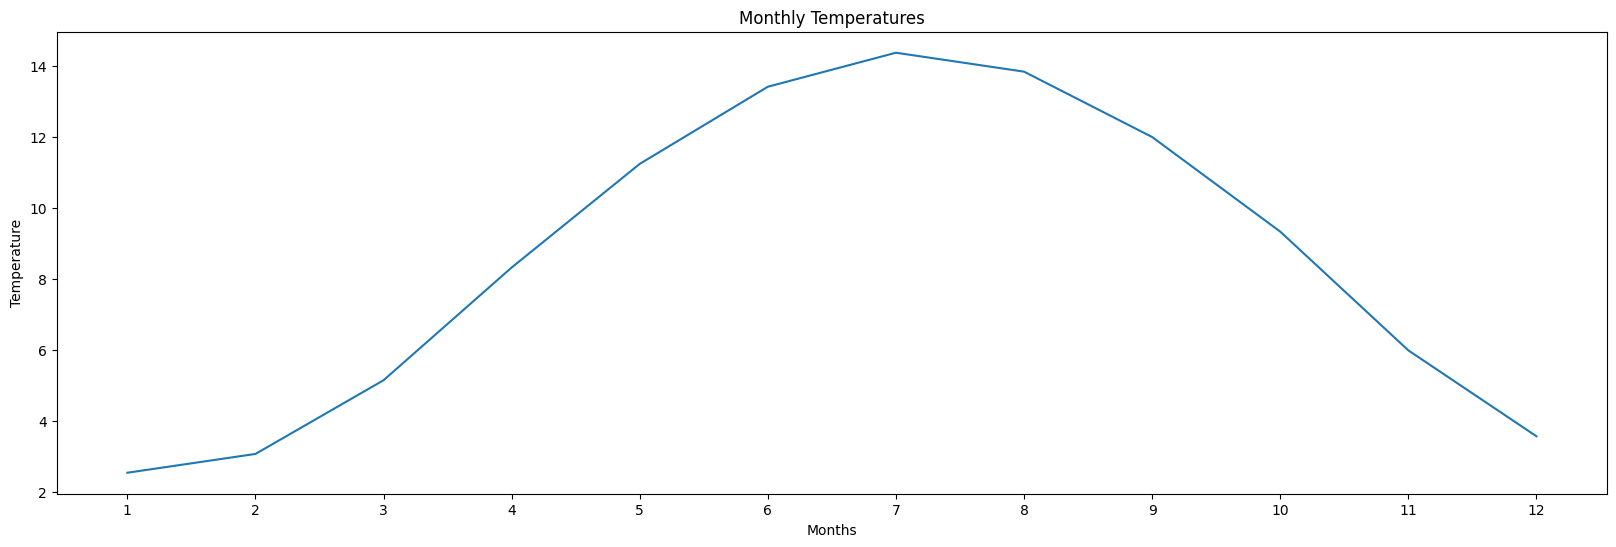

In [17]:
pivot = data.pivot_table(values='LandAverageTemperature', index=data.index.year, columns=data.index.month)

# Plot the monthly seasonality
monthly_seasonality = pivot.mean(axis=0)
monthly_seasonality.plot(figsize=(20, 6))
plt.title('Monthly Temperatures')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.xticks(range(1, 13))
plt.show()

# Bivariate Analysis

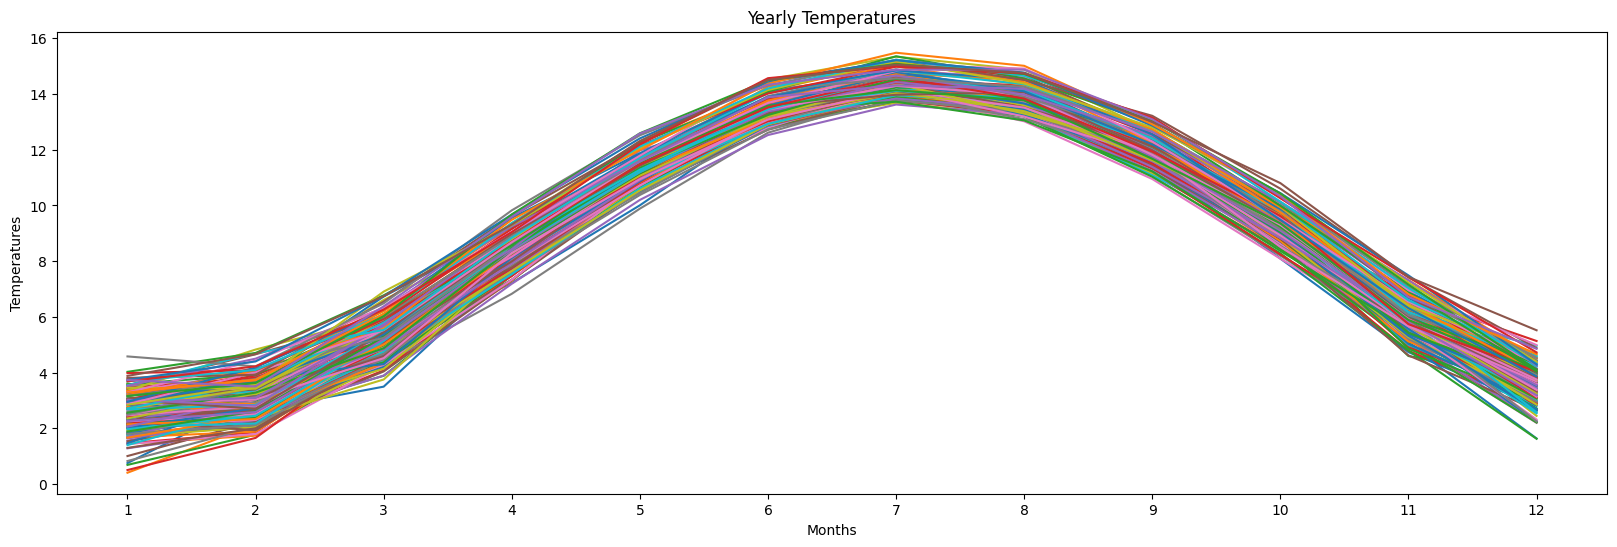

In [18]:
# Extract the month from the index and create a new 'month' column
data['month'] = data.index.month

# Extract the year from the index and create a new 'year' column
data['year'] = data.index.year

# Create a pivot table with 'LandAverageTemperature' as values,
# months as rows (index), and years as columns, aggregating by mean
pivot = pd.pivot_table(data, values='LandAverageTemperature', index='month', columns='year', aggfunc='mean')

# Plot the pivot table
pivot.plot(figsize=(20, 6))

# Set the title of the plot
plt.title('Yearly Temperatures')

# Set the x-axis label
plt.xlabel('Months')

# Set the y-axis label
plt.ylabel('Temperatures')

# Set the x-axis ticks to represent the months (1 to 12)
plt.xticks(range(1, 13))

# Remove the legend
plt.legend().remove()

# Display the plot
plt.show()

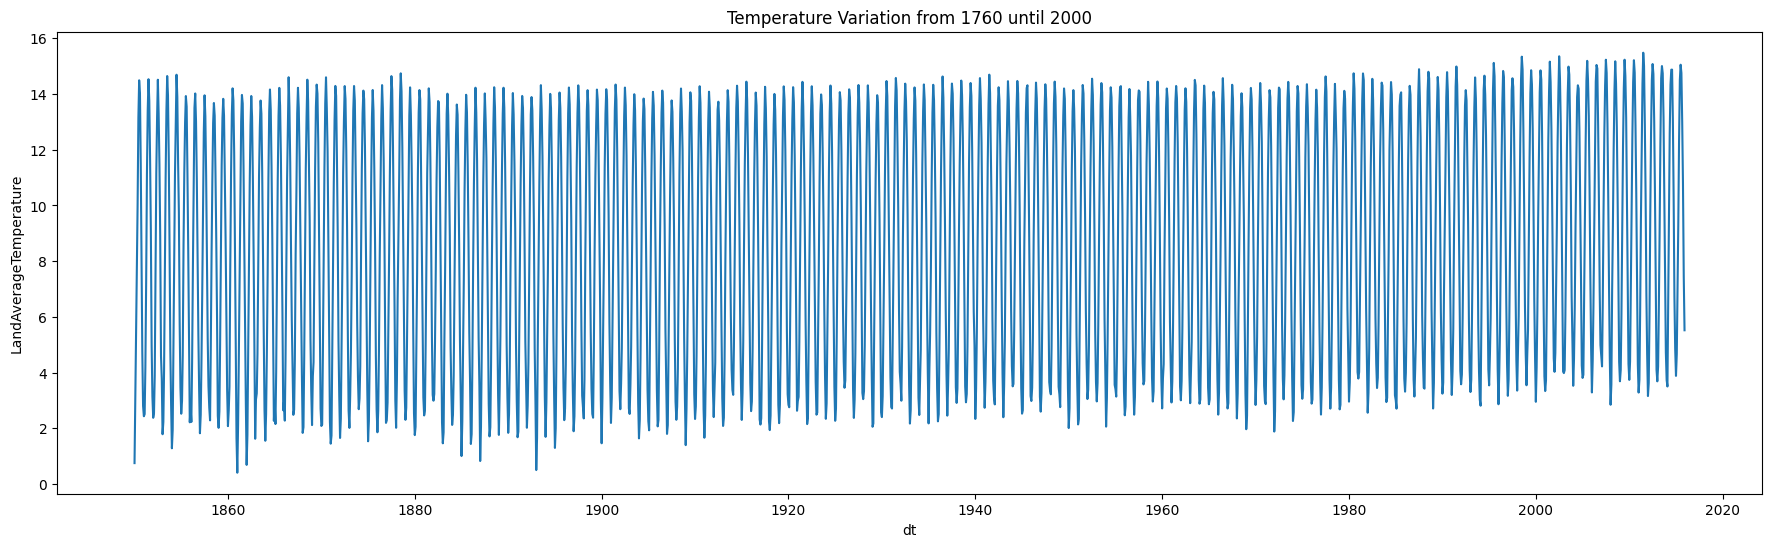

In [19]:
# Create a new figure with a specified size of 22x6 inches
plt.figure(figsize=(22, 6))

# Plot a line graph using seaborn, with the x-axis as the index (datetime) and y-axis as 'LandAverageTemperature'
sns.lineplot(x=data.index, y=data['LandAverageTemperature'])

# Set the title of the plot
plt.title('Temperature Variation from 1760 until 2000')

# Display the plot
plt.show()

# Descriptive Analysis

In [20]:
df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.571583,0.276663,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.263193,0.224030,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,0.404000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.430000,0.099750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.850500,0.230000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.858500,0.347250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,15.482000,1.492000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


# Augmented Dickey-Fuller Test

In [21]:
# Calculate the difference between consecutive values in the 'LandAverageTemperature' column
# and create a new column 'diff' to store these differences
data['diff'] = data['LandAverageTemperature'].diff().dropna()

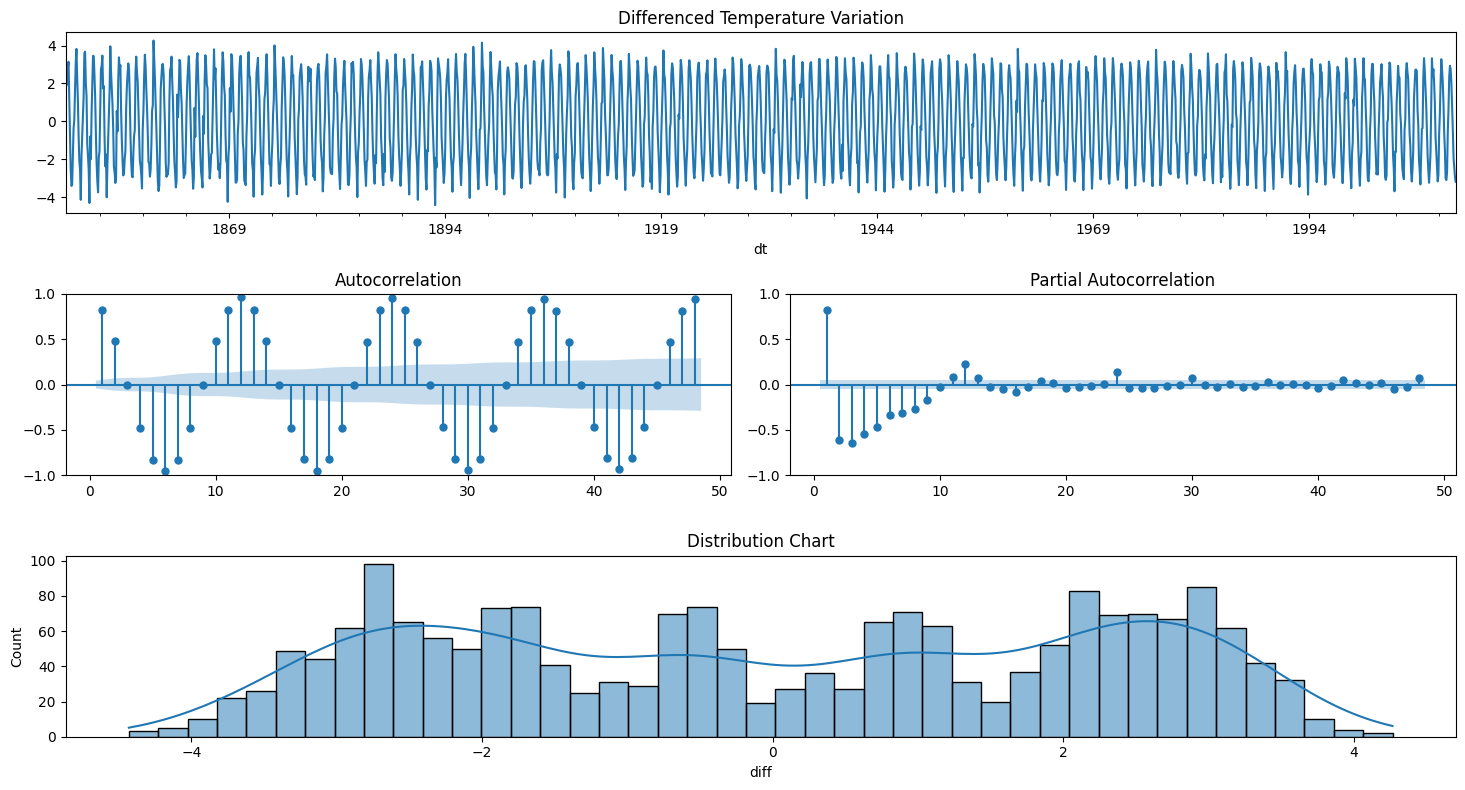

In [22]:
# Create a copy of the DataFrame 'data' containing all rows except the last 60 (training set)
train = data[:-60].copy()

# Extract the 'diff' column from the training set as the target variable 'y'
y = train['diff'].dropna()

# Number of lags to plot in the autocorrelation and partial autocorrelation plots
lags_plots = 48

# Size of the figure for plotting
figsize = (22, 8)

# Create a figure with the specified figsize
fig = plt.figure(figsize=figsize)

# Define subplot positions within a grid of 3x3
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)  # Top-left subplot spanning 2 columns
ax2 = plt.subplot2grid((3, 3), (1, 0))             # Middle-left subplot
ax3 = plt.subplot2grid((3, 3), (1, 1))             # Middle-right subplot
ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)  # Bottom subplot spanning 2 columns

# Plot the time series of 'y' on the top-left subplot
y.plot(ax=ax1)
ax1.set_title('Differenced Temperature Variation')

# Plot the autocorrelation function (ACF) of 'y' on the middle-left subplot
plot_acf(y, lags=lags_plots, zero=False, ax=ax2)

# Plot the partial autocorrelation function (PACF) of 'y' on the middle-right subplot
plot_pacf(y, lags=lags_plots, zero=False, ax=ax3)

# Plot the distribution (histogram with KDE) of 'y' on the bottom subplot
sns.histplot(y, bins=int(sqrt(len(y))), ax=ax4, kde=True)
ax4.set_title('Distribution Chart')

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

In [23]:
# Print a header for the Dickey-Fuller test results
print('Results of Dickey-Fuller Test:')

# Perform the Augmented Dickey-Fuller test on the time series 'y' and store the results
adfinput = adfuller(y)

# Create a pandas Series to organize and round the test results
adftest = pd.Series(adfinput[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])
adftest = round(adftest, 4)

# Loop through the critical values and add them to the adftest Series
for key, value in adfinput[4].items():
    adftest[f"Critical Value ({key})"] = round(value, 4)

# Print the formatted Dickey-Fuller test results
print(adftest)

# Compare the Test Statistic with the Critical Value at 5% significance level
if adftest['Test Statistic'] < adftest['Critical Value (5%)']:
    print('\nThe Test Statistic is lower than the Critical Value of 5%. \nThe series seems to be stationary.')
else:
    print("\nThe Test Statistic is higher than the Critical Value of 5%. \nThe series isn't stationary.")

Results of Dickey-Fuller Test:
Test Statistic                  -12.3999
p-value                           0.0000
Lags Used                        26.0000
Number of Observations Used    1904.0000
Critical Value (1%)              -3.4338
Critical Value (5%)              -2.8631
Critical Value (10%)             -2.5676
dtype: float64

The Test Statistic is lower than the Critical Value of 5%. 
The series seems to be stationary.


# Splitting Dataset Into Train And Test Sets

In [24]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import joblib

# Add Year and Month columns based on 'dt' column
df['Year'] = pd.to_datetime(df['dt']).dt.year
df['Month'] = pd.to_datetime(df['dt']).dt.month

# Prepare X (features) and y (target)
X = df.drop(['LandAverageTemperature', 'dt'], axis=1)
y = df['LandAverageTemperature']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale X and y using MinMaxScaler
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit and transform the training data
X_train_scaled = scaler_x.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))  # Reshape y_train to a 2D array

# Only transform the testing data
X_test_scaled = scaler_x.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))  # Reshape y_test to a 2D array

# Reshape X_train_scaled and X_test_scaled for LSTM input
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

# Print the shapes to verify
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("y_train_scaled shape:", y_train_scaled.shape)
print("y_test_scaled shape:", y_test_scaled.shape)

# Save the scaler
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Save the scaled data
joblib.dump({
    'X_train_scaled': X_train_scaled,
    'y_train_scaled': y_train_scaled,
    'X_test_scaled': X_test_scaled,
    'y_test_scaled': y_test_scaled
}, 'scaled_data.pkl')


X_train_scaled shape: (1593, 9, 1)
X_test_scaled shape: (399, 9, 1)
y_train_scaled shape: (1593, 1)
y_test_scaled shape: (399, 1)


['scaled_data.pkl']

# Model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional, Input
from tensorflow.keras.optimizers import Adam
from keras_tuner import HyperModel

# Define a class for the LSTM hypermodel
class LSTMHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()  # Initialize a sequential model
        
        # Add input layer
        model.add(Input(shape=(X_train_scaled.shape[1], 1)))
        
        # Add first Bidirectional LSTM layer with hyperparameter tuning for the number of units
        model.add(Bidirectional(LSTM(units=hp.Int('units_1', min_value=32, max_value=256, step=32), return_sequences=True)))
        
        # Add dropout layer with hyperparameter tuning for the dropout rate
        model.add(Dropout(rate=hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)))
        
        # Add second Bidirectional LSTM layer with hyperparameter tuning for the number of units
        model.add(Bidirectional(LSTM(units=hp.Int('units_2', min_value=32, max_value=256, step=32), return_sequences=True)))
        
        # Add dropout layer with hyperparameter tuning for the dropout rate
        model.add(Dropout(rate=hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)))
        
        # Add third Bidirectional LSTM layer with hyperparameter tuning for the number of units
        model.add(Bidirectional(LSTM(units=hp.Int('units_3', min_value=32, max_value=256, step=32))))
        
        # Add dropout layer with hyperparameter tuning for the dropout rate
        model.add(Dropout(rate=hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)))
        
        # Add Dense layer with hyperparameter tuning for the number of units
        model.add(Dense(units=hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
        
        # Add dropout layer with hyperparameter tuning for the dropout rate
        model.add(Dropout(rate=hp.Float('dropout_dense', min_value=0.1, max_value=0.5, step=0.1)))
        
        # Add output Dense layer
        model.add(Dense(1))
        
        # Compile the model with Adam optimizer and mean squared error loss, tuning the learning rate
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                      loss='mean_squared_error', metrics=['mae'])
        return model

# Import RandomSearch tuner from keras_tuner
from keras_tuner.tuners import RandomSearch

# Initialize the RandomSearch tuner
tuner = RandomSearch(
    LSTMHyperModel(),  # The hypermodel to tune
    objective='val_loss',  # Objective to minimize
    max_trials=10,  # Number of different hyperparameter combinations to try
    executions_per_trial=2,  # Number of times to train the model with each hyperparameter set
    directory='hyperparameter_tuning',  # Directory to save the results
    project_name='lstm_temperature_prediction'  # Name of the project
)

# Import EarlyStopping callback
from tensorflow.keras.callbacks import EarlyStopping

# Initialize EarlyStopping callback to stop training if the validation loss doesn't improve for 10 epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Search for the best hyperparameters using the training and validation data
tuner.search(X_train_scaled, y_train_scaled, epochs=50, validation_data=(X_test_scaled, y_test_scaled), callbacks=[early_stopping], verbose=2)

# Get the best hyperparameters found by the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Print the summary of the best model
best_model.summary()


Reloading Tuner from hyperparameter_tuning\lstm_temperature_prediction\tuner0.json


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 9, 128)              │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 9, 256)              │         263,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 9, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 384)                 │         689,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,036,033 (3.95 MB)

 Trainable params: 1,036,033 (3.95 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Train the model with the best hyperparameters
history = best_model.fit(
    X_train_scaled, y_train_scaled, 
    batch_size=64, epochs=100, 
    validation_data=(X_test_scaled, y_test_scaled), 
    callbacks=[early_stopping], 
    verbose=2
)

# Evaluate the best model
loss, mae = best_model.evaluate(X_test_scaled, y_test_scaled)
print(f"Validation Loss: {loss}, Validation MAE: {mae}")

# Save the best model
best_model.save('best_model.keras')


Epoch 1/100
25/25 - 9s - 366ms/step - loss: 0.1537 - mae: 0.3044 - val_loss: 0.0246 - val_mae: 0.1314
Epoch 2/100
25/25 - 1s - 48ms/step - loss: 0.0239 - mae: 0.1186 - val_loss: 0.0101 - val_mae: 0.0686
Epoch 3/100
25/25 - 1s - 43ms/step - loss: 0.0146 - mae: 0.0857 - val_loss: 0.0084 - val_mae: 0.0645
Epoch 4/100
25/25 - 1s - 43ms/step - loss: 0.0126 - mae: 0.0818 - val_loss: 0.0119 - val_mae: 0.0924
Epoch 5/100
25/25 - 1s - 40ms/step - loss: 0.0121 - mae: 0.0790 - val_loss: 0.0060 - val_mae: 0.0545
Epoch 6/100
25/25 - 1s - 38ms/step - loss: 0.0089 - mae: 0.0670 - val_loss: 0.0062 - val_mae: 0.0514
Epoch 7/100
25/25 - 1s - 39ms/step - loss: 0.0077 - mae: 0.0622 - val_loss: 0.0033 - val_mae: 0.0355
Epoch 8/100
25/25 - 1s - 45ms/step - loss: 0.0062 - mae: 0.0548 - val_loss: 0.0033 - val_mae: 0.0434
Epoch 9/100
25/25 - 1s - 44ms/step - loss: 0.0055 - mae: 0.0535 - val_loss: 0.0031 - val_mae: 0.0398
Epoch 10/100
25/25 - 1s - 42ms/step - loss: 0.0048 - mae: 0.0493 - val_loss: 0.0030 - val_

# Performance Testing

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


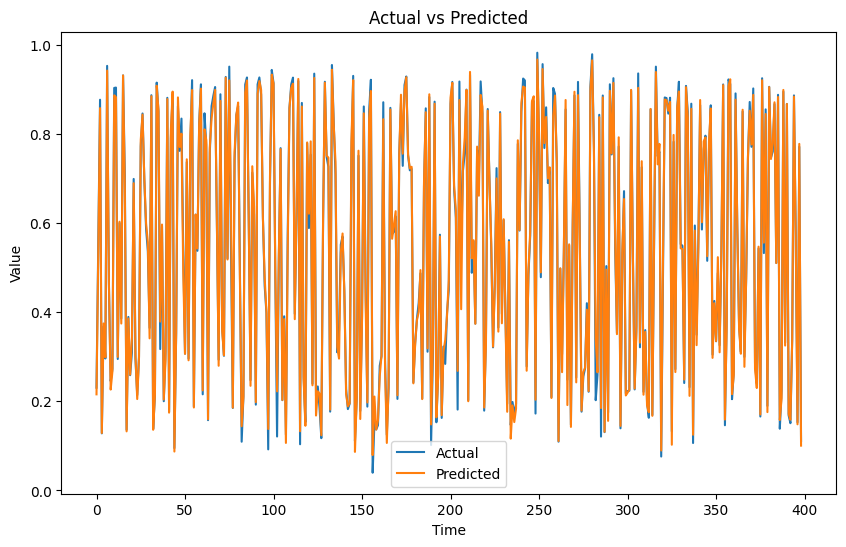

In [28]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Generate predictions using the trained model on the test data

model = load_model('best_model.keras')
predictions = model.predict(X_test_scaled)

# Create a new figure with a size of 10x6 inches
plt.figure(figsize=(10, 6))

# Plot the actual values (ytest) as a line plot with label 'Actual'
plt.plot(y_test_scaled, label='Actual')

# Plot the predicted values (predictions) as a line plot with label 'Predicted'
plt.plot(predictions, label='Predicted')

# Set the title of the plot
plt.title('Actual vs Predicted')

# Set the x-axis label
plt.xlabel('Time')

# Set the y-axis label
plt.ylabel('Value')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


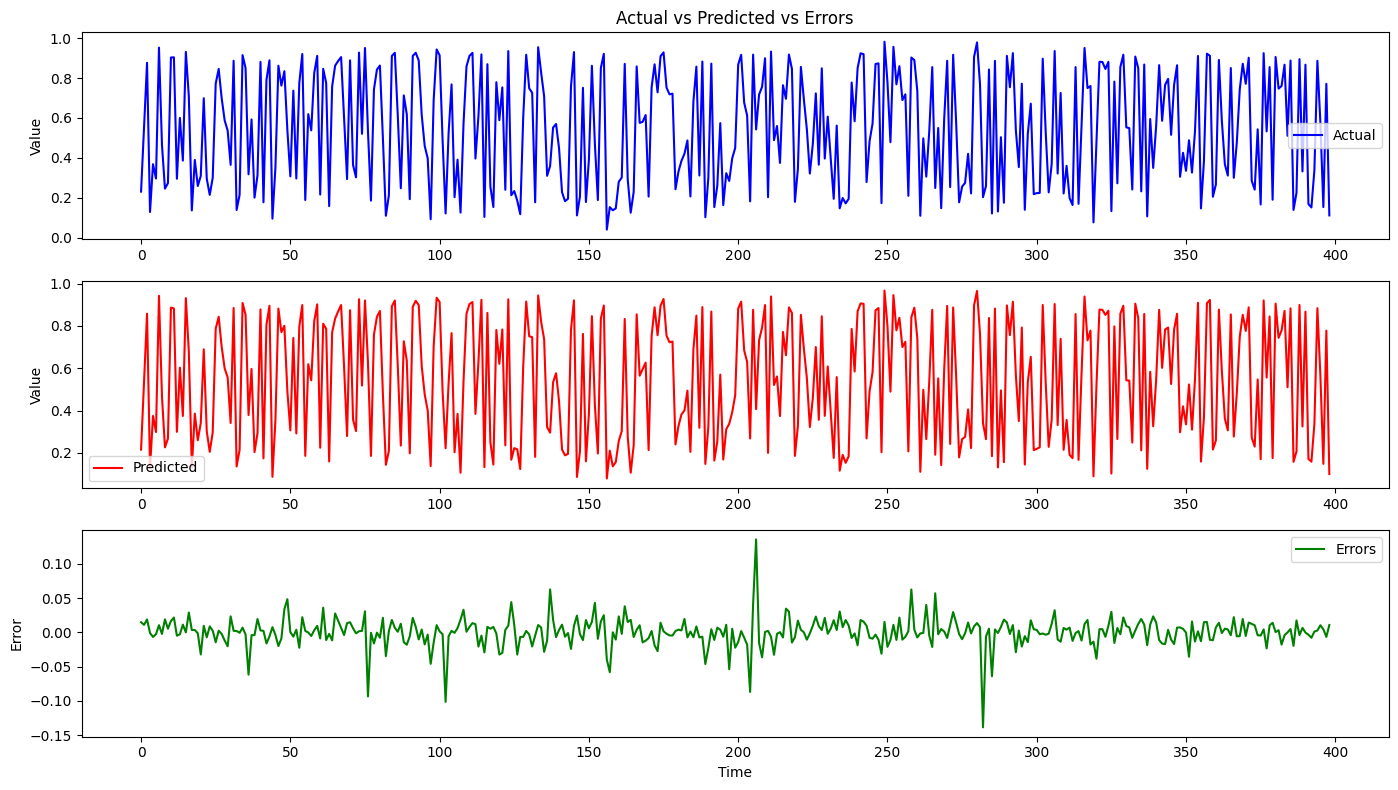

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Generate predictions using the trained model on the test data
predictions = model.predict(X_test_scaled)

# Calculate errors as the difference between ytest (actual) and predictions
errors = y_test_scaled - predictions

# Create a new figure with a size of 14x8 inches
plt.figure(figsize=(14, 8))

# Subplot 1: Actual values (ytest) plot
plt.subplot(3, 1, 1)
plt.plot(y_test_scaled, label='Actual', color='blue')
plt.title('Actual vs Predicted vs Errors')  # Set subplot title
plt.ylabel('Value')  # Set y-axis label
plt.legend()  # Display legend for this subplot

# Subplot 2: Predicted values (predictions) plot
plt.subplot(3, 1, 2)
plt.plot(predictions, label='Predicted', color='red')
plt.ylabel('Value')  # Set y-axis label
plt.legend()  # Display legend for this subplot

# Subplot 3: Errors plot
plt.subplot(3, 1, 3)
plt.plot(errors, label='Errors', color='green')
plt.ylabel('Error')  # Set y-axis label
plt.xlabel('Time')  # Set x-axis label
plt.legend()  # Display legend for this subplot

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()

# Display the plot
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


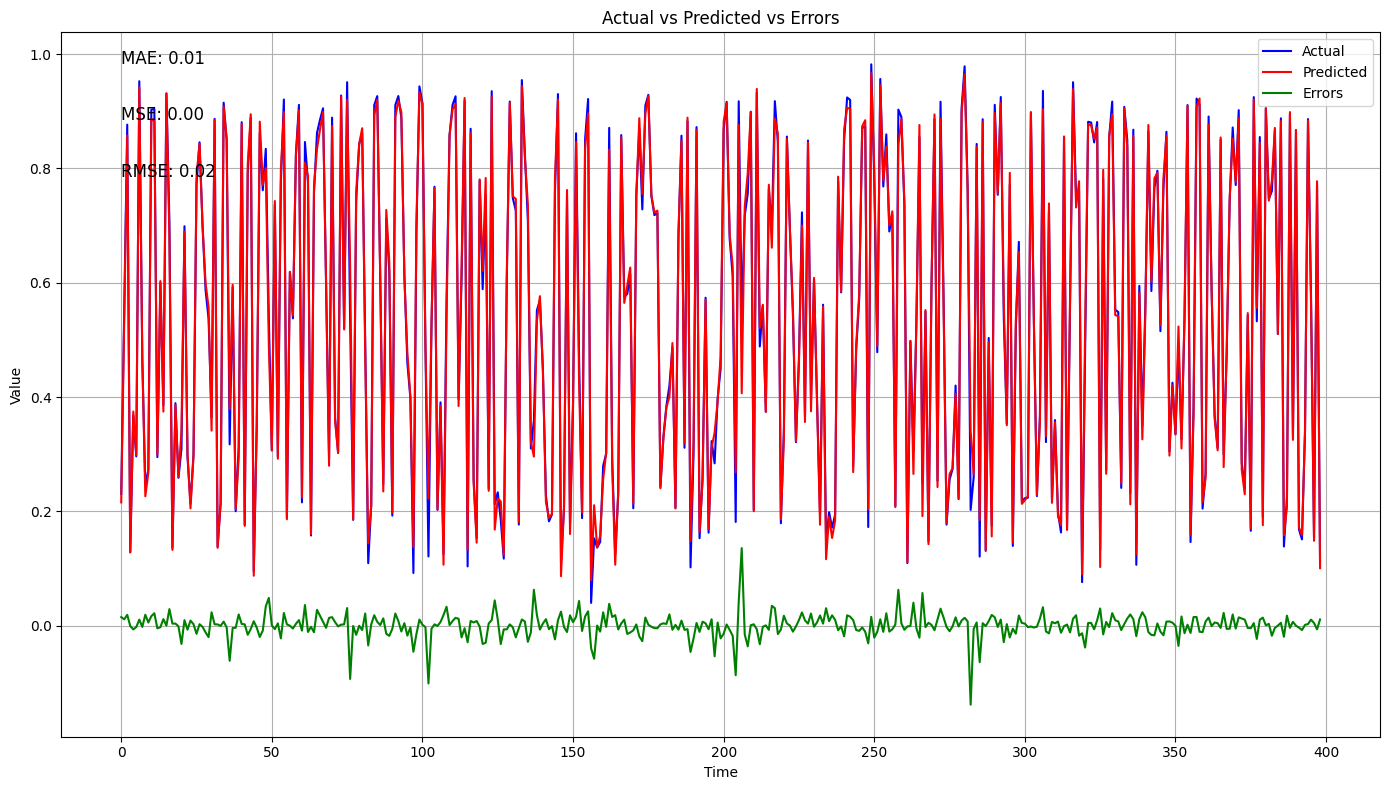

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate predictions using the trained model on the test data
predictions = model.predict(X_test_scaled)

# Calculate errors as the difference between ytest (actual) and predictions
errors = y_test_scaled - predictions

# Calculate evaluation metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(y_test_scaled, predictions)
mse = mean_squared_error(y_test_scaled, predictions)
rmse = np.sqrt(mse)

# Create a new figure with a size of 14x8 inches
plt.figure(figsize=(14, 8))

# Plot actual values (ytest) as a line plot with label 'Actual' in blue
plt.plot(y_test_scaled, label='Actual', color='blue')

# Plot predicted values (predictions) as a line plot with label 'Predicted' in red
plt.plot(predictions, label='Predicted', color='red')

# Plot errors as a line plot with label 'Errors' in green
plt.plot(errors, label='Errors', color='green')

# Display MAE, MSE, and RMSE values as text annotations on the plot
plt.text(0, np.max(y_test_scaled), f"MAE: {mae:.2f}", fontsize=12, color='black')
plt.text(0, np.max(y_test_scaled)*0.9, f"MSE: {mse:.2f}", fontsize=12, color='black')
plt.text(0, np.max(y_test_scaled)*0.8, f"RMSE: {rmse:.2f}", fontsize=12, color='black')

# Set plot title, x-axis label, and y-axis label
plt.title('Actual vs Predicted vs Errors')
plt.ylabel('Value')
plt.xlabel('Time')

# Display legend
plt.legend()

# Enable grid on the plot
plt.grid(True)

# Adjust layout to prevent overlapping of elements
plt.tight_layout()

# Display the plot
plt.show()